# CHICAGO CRIME DATA VISUALISATION USING API

In [2]:
# pip install folium 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import seaborn as sns
from folium.plugins import MarkerCluster

In [4]:
# Reading the data using the json APLI
url = 'https://data.cityofchicago.org/resource/ijzp-q8t2.json?$limit=100000&'
#url = 'https://data.cityofchicago.org/resource/ijzp-q8t2.json?'
df = pd.read_json(url)


In [5]:
# Visualizing the data
df.head()

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,longitude,location,:@computed_region_awaf_s7ux,:@computed_region_6mkv_f3dw,:@computed_region_vrxf_vc4k,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,:@computed_region_rpca_8um6,:@computed_region_d9mm_jgwp,:@computed_region_d3ds_rm58
0,12021468,JD199364,2020-03-31 23:55:00,030XX W LAWRENCE AVE,041A,BATTERY,AGGRAVATED - HANDGUN,STREET,False,False,...,-87.703906,"{'latitude': '41.968491664', 'longitude': '-87...",2.0,21849.0,14.0,749.0,20.0,20.0,1.0,1.0
1,12021425,JD199337,2020-03-31 23:47:00,055XX S HALSTED ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,ALLEY,False,False,...,-87.645136,"{'latitude': '41.79343116', 'longitude': '-87....",12.0,21559.0,66.0,113.0,4.0,11.0,17.0,135.0
2,12021467,JD199338,2020-03-31 23:45:00,042XX W IRVING PARK RD,1310,CRIMINAL DAMAGE,TO PROPERTY,BAR OR TAVERN,False,False,...,-87.732989,"{'latitude': '41.953589946', 'longitude': '-87...",25.0,22618.0,16.0,295.0,50.0,21.0,1.0,11.0
3,12021486,JD199333,2020-03-31 23:42:00,039XX W 26TH ST,0330,ROBBERY,AGGRAVATED,SIDEWALK,False,False,...,-87.723744,"{'latitude': '41.844262859', 'longitude': '-87...",14.0,21569.0,32.0,771.0,28.0,57.0,21.0,167.0
4,12021451,JD199351,2020-03-31 23:40:00,094XX S ASHLAND AVE,0330,ROBBERY,AGGRAVATED,CTA BUS,False,False,...,-87.662700,"{'latitude': '41.722133766', 'longitude': '-87...",18.0,21554.0,72.0,195.0,13.0,59.0,9.0,245.0


In [6]:
# Cleaning the datframe for unwanted columns

df = df.drop(columns=[':@computed_region_awaf_s7ux',':@computed_region_6mkv_f3dw',':@computed_region_vrxf_vc4k',':@computed_region_bdys_3d7i',':@computed_region_43wa_7qmu',':@computed_region_rpca_8um6',':@computed_region_d9mm_jgwp',':@computed_region_d3ds_rm58'], axis = 1)


In [7]:
df.dropna();
df

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,12021468,JD199364,2020-03-31 23:55:00,030XX W LAWRENCE AVE,041A,BATTERY,AGGRAVATED - HANDGUN,STREET,False,False,...,33.0,14.0,04B,1155421.0,1931737.0,2020,2020-04-07T15:50:44.000,41.968492,-87.703906,"{'latitude': '41.968491664', 'longitude': '-87..."
1,12021425,JD199337,2020-03-31 23:47:00,055XX S HALSTED ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,ALLEY,False,False,...,20.0,68.0,15,1171915.0,1868068.0,2020,2020-04-07T15:50:44.000,41.793431,-87.645136,"{'latitude': '41.79343116', 'longitude': '-87...."
2,12021467,JD199338,2020-03-31 23:45:00,042XX W IRVING PARK RD,1310,CRIMINAL DAMAGE,TO PROPERTY,BAR OR TAVERN,False,False,...,45.0,16.0,14,1147550.0,1926250.0,2020,2020-04-07T15:50:44.000,41.953590,-87.732989,"{'latitude': '41.953589946', 'longitude': '-87..."
3,12021486,JD199333,2020-03-31 23:42:00,039XX W 26TH ST,0330,ROBBERY,AGGRAVATED,SIDEWALK,False,False,...,22.0,30.0,03,1150348.0,1886429.0,2020,2020-04-07T15:50:44.000,41.844263,-87.723744,"{'latitude': '41.844262859', 'longitude': '-87..."
4,12021451,JD199351,2020-03-31 23:40:00,094XX S ASHLAND AVE,0330,ROBBERY,AGGRAVATED,CTA BUS,False,False,...,21.0,73.0,03,1167328.0,1842050.0,2020,2020-04-07T15:50:44.000,41.722134,-87.662700,"{'latitude': '41.722133766', 'longitude': '-87..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,11868278,JC481331,2019-10-21 18:14:00,047XX S WOLCOTT AVE,041A,BATTERY,AGGRAVATED: HANDGUN,RESIDENCE PORCH/HALLWAY,False,False,...,15.0,61.0,04B,1164486.0,1873178.0,2019,2019-10-28T16:00:06.000,41.807614,-87.672234,"{'latitude': '41.807613584', 'longitude': '-87..."
99996,11868069,JC481481,2019-10-21 18:13:00,001XX W DIVISION ST,2890,PUBLIC PEACE VIOLATION,OTHER VIOLATION,STREET,True,False,...,2.0,8.0,24,1174716.0,1908335.0,2019,2019-10-28T16:00:06.000,41.903865,-87.633662,"{'latitude': '41.903864889', 'longitude': '-87..."
99997,11867947,JC481325,2019-10-21 18:12:00,040XX W LAKE ST,1210,DECEPTIVE PRACTICE,THEFT OF LABOR/SERVICES,CTA STATION,True,False,...,28.0,26.0,11,1149512.0,1901446.0,2019,2019-10-28T16:00:06.000,41.885488,-87.726422,"{'latitude': '41.885487535', 'longitude': '-87..."
99998,11868247,JC481572,2019-10-21 18:10:00,025XX N KEDZIE BLVD,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,32.0,22.0,14,1154610.0,1916725.0,2019,2019-10-28T16:00:06.000,41.927314,-87.707292,"{'latitude': '41.92731401', 'longitude': '-87...."


### Data exploration from our side.

In [8]:
df['primary_type'].value_counts()

THEFT                                24074
BATTERY                              19214
CRIMINAL DAMAGE                      10040
ASSAULT                               7894
DECEPTIVE PRACTICE                    6846
OTHER OFFENSE                         6440
NARCOTICS                             5243
BURGLARY                              3759
MOTOR VEHICLE THEFT                   3642
ROBBERY                               3509
CRIMINAL TRESPASS                     2726
WEAPONS VIOLATION                     2518
OFFENSE INVOLVING CHILDREN             985
INTERFERENCE WITH PUBLIC OFFICER       566
SEX OFFENSE                            496
PUBLIC PEACE VIOLATION                 490
CRIM SEXUAL ASSAULT                    377
CRIMINAL SEXUAL ASSAULT                222
PROSTITUTION                           221
HOMICIDE                               176
ARSON                                  160
LIQUOR LAW VIOLATION                    80
STALKING                                79
KIDNAPPING 

In [9]:
np.sum(df['primary_type'].value_counts())

100000

In [10]:
pd.value_counts(df['primary_type'])[:10]

THEFT                  24074
BATTERY                19214
CRIMINAL DAMAGE        10040
ASSAULT                 7894
DECEPTIVE PRACTICE      6846
OTHER OFFENSE           6440
NARCOTICS               5243
BURGLARY                3759
MOTOR VEHICLE THEFT     3642
ROBBERY                 3509
Name: primary_type, dtype: int64

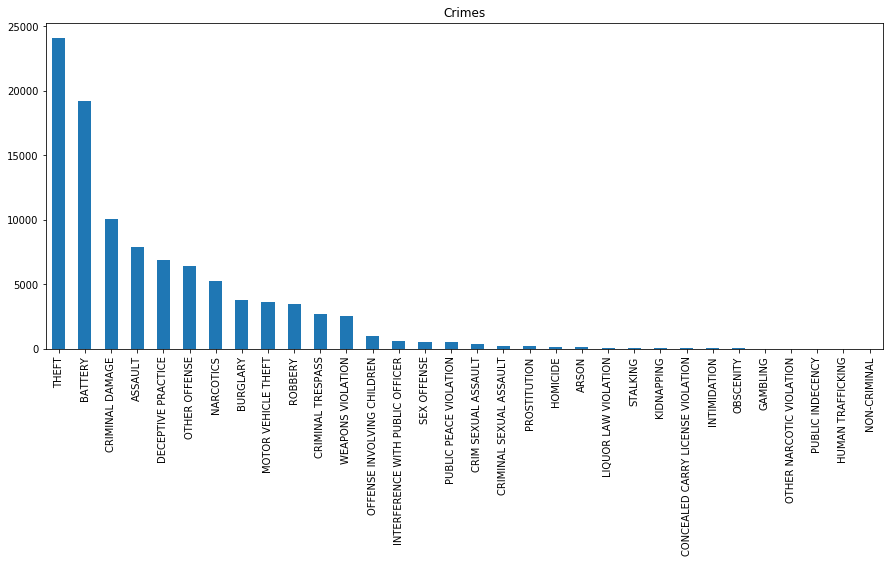

In [11]:
# Type of crimes by their count
plt.figure(figsize=(15,6))
df['primary_type'].value_counts().plot.bar()
plt.title("Crimes")
plt.show()

### What more can we explore??

In [12]:
pd.value_counts(df['location_description'])[:10]

STREET                            21548
RESIDENCE                         16806
APARTMENT                         14904
SIDEWALK                           6686
OTHER                              3365
SMALL RETAIL STORE                 2854
RESTAURANT                         2635
PARKING LOT/GARAGE(NON.RESID.)     2290
DEPARTMENT STORE                   1995
ALLEY                              1827
Name: location_description, dtype: int64

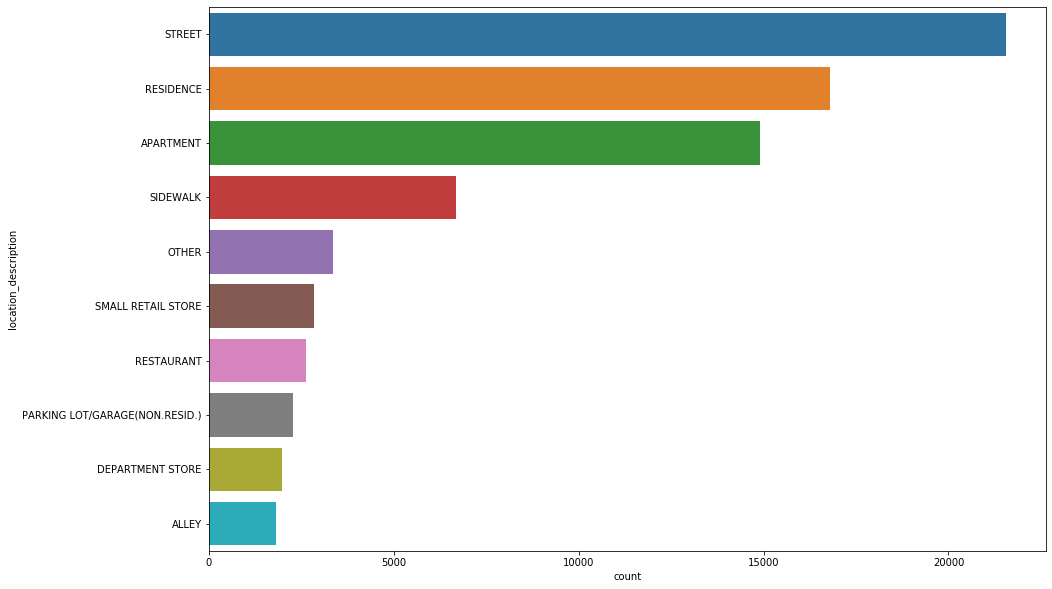

In [13]:
# Location and count of the crime
plt.figure(figsize = (15, 10))
sns.countplot(y= 'location_description', data = df, order = df['location_description'].value_counts().iloc[:10].index);

### Viewing one location each in a particular community area

In [48]:
chicago_map = folium.Map(location=[41.864073,-87.706819],zoom_start=10,tiles="OpenStreetMap")

In [49]:
#locations
locations = df.groupby('community_area').first()

In [50]:
new_locations = locations.loc[:, ['latitude', 'longitude', 'location_description', 'arrest']]
new_locations

,latitude,longitude,location_description,arrest
community_area,,,,
1.0,42.022063,-87.674849,CTA PARKING LOT / GARAGE / OTHER PROPERTY,False
2.0,41.984152,-87.691905,OTHER (SPECIFY),False
3.0,41.964918,-87.650001,RESIDENCE,False
4.0,41.963762,-87.691205,VEHICLE NON-COMMERCIAL,False
5.0,41.943553,-87.688162,GROCERY FOOD STORE,False
...,...,...,...,...
73.0,41.722134,-87.662700,CTA BUS,False
74.0,41.683936,-87.721829,RESIDENCE,False
75.0,41.691841,-87.676859,STREET,False


In [51]:
## plotting the communities in Chicago
for i in range(len(new_locations)):
    lat = new_locations.iloc[i][0]
    long = new_locations.iloc[i][1]
    popup_text = """Community Index : {}<br>
                Arrest : {}<br>
                Location Description : {}<br>"""
    popup_text = popup_text.format(new_locations.index[i],
                               new_locations.iloc[i][-1],
                               new_locations.iloc[i][-2]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text, fill = True).add_to(chicago_map)

In [52]:
chicago_map

### A simple Criminal Rate Index DataFrame

In [19]:
df['location'] = list(zip(df.latitude, df.longitude))
display(df['location'])
#df['location'][0][0]+df['location'][0][1]

0        (41.968491664, -87.703906426)
1          (41.79343116, -87.64513632)
2        (41.953589946, -87.732989305)
3        (41.844262859, -87.723743644)
4        (41.722133766, -87.662700182)
                     ...              
99995    (41.807613584, -87.672233728)
99996    (41.903864889, -87.633662323)
99997    (41.885487535, -87.726422045)
99998     (41.92731401, -87.707291627)
99999    (41.884090949, -87.659532917)
Name: location, Length: 100000, dtype: object

In [20]:
df['location'].index

RangeIndex(start=0, stop=100000, step=1)

In [21]:
unique_locations = df['location'].value_counts()

In [22]:
unique_locations.index
#unique_locations.index[latitude]

Index([(41.883500187, -87.627876698), (41.754592961, -87.741528537),
       (41.976290414, -87.905227221), (41.868541914, -87.639235361),
       (41.884650262, -87.627915459), (41.897895128, -87.624096605),
       (41.742710224, -87.634088181),  (41.88171846, -87.627760426),
       (41.891694878, -87.626155832), (41.963070794, -87.655984213),
       ...
       (41.821757017, -87.700888002), (41.947718864, -87.739087695),
       (41.779669026, -87.650273392), (41.767561597, -87.682003538),
        (41.834638848, -87.65105794), (41.934435237, -87.756532296),
       (41.748337248, -87.703573352), (41.880932047, -87.709514547),
       (41.847122477, -87.691521441),  (41.74341054, -87.605015461)],
      dtype='object', length=60664)

In [23]:
CR_index = pd.DataFrame({"Raw_String" :unique_locations.index,"ValueCount":unique_locations})
CR_index.index = range(len(unique_locations))
CR_index

,Raw_String,ValueCount
0,"(41.883500187, -87.627876698)",237
1,"(41.754592961, -87.741528537)",151
2,"(41.976290414, -87.905227221)",132
3,"(41.868541914, -87.639235361)",124
4,"(41.884650262, -87.627915459)",115
...,...,...
60659,"(41.934435237, -87.756532296)",1
60660,"(41.748337248, -87.703573352)",1
60661,"(41.880932047, -87.709514547)",1
60662,"(41.847122477, -87.691521441)",1


In [24]:
len(CR_index)

60664

In [25]:
CR_index.keys()

Index(['Raw_String', 'ValueCount'], dtype='object')

In [26]:
#CR_index['Raw_String'][0]
#CR_index['Raw_String'][0][0]

In [27]:
def Location_extractor(Raw_Str):
    preProcess = Raw_Str
    lat =  float(preProcess[0])
    long = float(preProcess[1])
    return (lat, long)

In [28]:
CR_index['LocationCoord'] = CR_index['Raw_String'].apply(Location_extractor)

In [29]:
CR_index  = CR_index.drop(columns=['Raw_String'], axis = 1)

In [30]:
CR_index['LocationCoord'].iloc[0][0],CR_index['LocationCoord'].iloc[0][1]


(41.883500187, -87.627876698)

### A Simple Chicago Mapping showing the total criminal rates.

In [31]:
#%%time
#plt.figure(figsize=(10,10))
#f = folium.Figure(width=1368, height=1080)
#chicago_map_crime = folium.Map(location=[41.8781, -87.6298],zoom_start=10,tiles="OpenStreetMap").add_to(f)

In [32]:

chicago_map_crime = folium.Map(location=[41.8781, -87.6298],zoom_start=10,tiles="OpenStreetMap")

for i in range(500):
    lat = CR_index['LocationCoord'].iloc[i][0]
    long = CR_index['LocationCoord'].iloc[i][1]
    radius = CR_index['ValueCount'].iloc[i] /5
    
    if CR_index['ValueCount'].iloc[i] >75:
        color = "#FF4500"
    else:
        color = "#008080"
    
    popup_text = """Latitude : {}<br>Longitude : {}<br>Criminal Incidents : {}<br>"""
    
    popup_text = popup_text.format(lat,long,CR_index['ValueCount'].iloc[i])
                               
    folium.CircleMarker(location = [lat, long], popup= popup_text,radius = radius, color = color, fill = True)\
    .add_to(chicago_map_crime)

In [33]:
chicago_map_crime

### Taking all the battery crimes commited with guns

In [34]:

gun_Battery_df = df.loc[(df['primary_type'] == 'BATTERY') & (df['description'] == 'AGGRAVATED - HANDGUN')]

In [35]:
Chicago_coordinates = [41.8781, -87.6298] # Took from google

# Creating a chicago map

my_map1 = folium.Map(location = Chicago_coordinates, 
                                        zoom_start = 9.8)

In [36]:
# Setting cluster markers by locations for gun crimes
mc = MarkerCluster()
for row in gun_Battery_df.itertuples():
    mc.add_child(folium.Marker(location=[row.latitude,  row.longitude], popup= 'gun')),

In [37]:
# Adding markers to my map
my_map1.add_child(mc)

### References

 https://python-visualization.github.io/folium/quickstart.html.
 
 https://towardsdatascience.com/data-visualization-with-python-folium-maps-a74231de9ef7